# HYPOTHESIS TESTING: NON-PARAMETRIC

Non-Parametric:
- Tidak mengikuti asumsi distribusi normal
- Tidak cukup data (<100)
- Membandingkan median

In [2]:
import numpy as np 
import pandas as pd 

### **a) Mann Whitney**

Mann Whitney Test mirip seperti Two Sample Independent (unpaired) T-Test, tetapi untuk versi Statistik Non-parametrik-nya. Pada studi kasus ini kita hendak menguji apakah ada perbedaan median nilai (Score) kinerja antara karyawan yang baca buku atau tidak.


In [3]:
training = pd.concat([
    pd.Series(
        data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],
        name = 'Read Book'),
    pd.Series(
        data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')], 
    axis = 1)

training.head()


,Read Book,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80


In [6]:
# mengetahui median dari kedua group Read Book Yes vs Read Book No
training.groupby('Read Book').median()

,Score
Read Book,
No,77.5
Yes,70.0


**Hypothesis**

- Ho: median score pada kelompok karyawan yang tidak baca buku SAMA DENGAN yang baca buku
- Ha: median score pada kelompok karyawan yang tidak baca buku LEBIH BESAR DARI yang baca buku

In [7]:
from scipy.stats import mannwhitneyu

In [9]:
training[training['Read Book']=='No']['Score']

1     85
4     80
5     70
6     90
9     80
12    70
14    80
16    55
17    75
18    65
Name: Score, dtype: int64

In [11]:
# uji mann whitney U test
u_stat, pvalue = mannwhitneyu(
    training[training['Read Book']=='No']['Score'],
    training[training['Read Book']=='Yes']['Score'],
    alternative='greater'
)

pvalue

0.1996116335589066

In [16]:
# Kesimpulan

if pvalue > 0.05:
    print('''pvalue > 0.05. Failed to reject H null.
             Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Jadi median score dari kelompok karyawan yang tidak baca buku sama dengan yang baca buku''')
else:
    print('''pvalue <= 0.05. Reject H null.
             Artinya kita punya cukup bukti secara statistik bahwa median score dari kelompok karyawan yang tidak baca buku lebih dari yang baca buku''')

pvalue > 0.05. Failed to reject H null.
             Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Jadi median score dari kelompok karyawan yang tidak baca buku sama dengan yang baca buku


### **b) Wilcoxon**

Wilcoxon Test mirip dengan Two Paired T-test (Dua sampel berpasangan), tapi untuk versi statistik non-parametrik-nya. Dua sampel berpasangan banyak digunakan untuk situasi eksperimen. Jadi, kita sebagai peneliti hendak menguji apakah ada perbedaan sebelum dan setelah tindakan, peristiwa, atau kondisi tertentu.

Pada studi kasus di bawah ini, kita membuat Dummy Dataset yang berisi perbandingan kinerja antara karyawan yang menggunakan dan tidak menggunakan Smartphone saat bekerja. Kita bandingkan apakah ada perbedaan kinerja di antara 2 kondisi tersebut.

--> Saat tidak diberi izin pakai smartphone vs Saat diberi izin pakai smartphone (treatment)

**Membuat Dummy Dataset**: Working performance without and using Smartphone


In [18]:
with_smartphone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_smartphone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

df_paired = pd.DataFrame({
    'no':without_smartphone,
    'yes':with_smartphone
})

df_paired['diff'] = df_paired['yes'] - df_paired['no']
df_paired


,no,yes,diff
0,636,604,-32
1,623,556,-67
2,615,540,-75
3,672,522,-150
4,601,469,-132
5,600,544,-56
6,542,513,-29
7,554,470,-84
8,543,556,13
9,520,531,11


In [25]:
df_paired['yes'].median(), df_paired['no'].median()

(538.5, 584.0)

**Hypothesis**

- Ho: median dari selisih score kinerja karyawan yang main smartphone (yes) dan yang tidak main smartphone (no) SAMA DENGAN 0 
- Ha: median dari selisih score kinerja karyawan yang main smartphone (yes) dan yang tidak main smartphone (no) LEBIH KECIL DARI 0 


In [23]:
from scipy.stats import wilcoxon

In [30]:
# wilcoxon test (parameter x diisi dengan selisih antara kelompok A dan B)

stat, pvalue = wilcoxon(x=df_paired['diff'], alternative='less')
pvalue

0.0008392333984375

In [29]:
# wilcoxon test (parameter x diisi dengan kelompok A dan parameter y diisi dengan kelompok B)

stat, pvalue = wilcoxon(
    x=df_paired['yes'],
    y=df_paired['no'],
    alternative='less')
    
pvalue

0.0008392333984375

In [27]:
# Kesimpulan

if pvalue > 0.05:
    print('''pvalue > 0.05. Failed to reject H null.
             Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. Jadi median score dari kelompok karyawan yang main smartphone sama dengan yang tidak main smartphone''')
else:
    print('''pvalue <= 0.05. Reject H null.
             Artinya kita punya cukup bukti secara statistik bahwa median score dari kelompok karyawan yang main smartphone lebih kecil dari yang tidak main smartphone''')

pvalue <= 0.05. Reject H null.
             Artinya kita punya cukup bukti secara statistik bahwa median score dari kelompok karyawan yang main smartphone lebih kecil dari yang tidak main smartphone


### **c) Kruskal Wallis**

Kruskal Wallis Test digunakan untuk menguji perbandingan lebih dari 2 sampel independent dalam statistik non-parametrik. 
Pada studi kasus ini kita hendak membandingkan jumlah investasi bulanan antar karyawan. 
Karyawan dibagi tiga berdasarkan transportasi yang dipakai, yaitu pejalan kaki, pengguna transportasi umum, 
dan pengendara transporatasi pribadi. Kita uji apakah ada perbedaan 



In [31]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())
    
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                         pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Monthly Investment')], axis =1)

transportdf

,Transportation,Monthly Investment
0,Walking,5
1,Walking,4
2,Walking,5
3,Walking,6
4,Walking,5
5,Walking,3
6,Walking,2
7,Walking,4
8,Walking,5
9,Walking,5


**Hypothesis**

- Ho: median tabungan bulanan dari semua kelompok (Walking, Public, Private) adalah sama
- Ha: minimal salah satu median tabungan bulanan dari ketiga kelompok ada yg berbeda. Tapi kita tidak tahu yang mana.

In [32]:
# median tabungan bulanan masing-masing kelompok

transportdf.groupby('Transportation').median()

,Monthly Investment
Transportation,
Private,5.0
Public,6.0
Walking,5.0


In [33]:
from scipy.stats import kruskal

In [36]:
transportdf[transportdf['Transportation']=='Private']['Monthly Investment']

20    5
21    4
22    5
23    6
24    6
25    5
26    5
27    5
28    7
29    7
Name: Monthly Investment, dtype: int64

In [38]:
stat, pvalue = kruskal(
    transportdf[transportdf['Transportation']=='Private']['Monthly Investment'],
    transportdf[transportdf['Transportation']=='Public']['Monthly Investment'],
    transportdf[transportdf['Transportation']=='Walking']['Monthly Investment']    
)

pvalue

0.029913168775421856

In [39]:
# Kesimpulan

if pvalue > 0.05:
    print('''pvalue > 0.05. Failed to reject H null.
             Artinya kita tidak memiliki cukup bukti secara statistik untuk menolak H null. 
             Jadi median tabungan bulanan dari semua kelompok karyawan adalah sama''')
else:
    print('''pvalue <= 0.05. Reject H null.
             Artinya kita punya cukup bukti secara statistik bahwa salah satu median tabungan bulanan dari ketiga kelompok karyawan ada yang berbeda. Tapi kita tidak tahu yang mana''')

pvalue <= 0.05. Reject H null.
             Artinya kita punya cukup bukti secara statistik bahwa salah satu median tabungan bulanan dari ketiga kelompok karyawan ada yang berbeda. Tapi kita tidak tahu yang mana


# CORRELATION

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [41]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


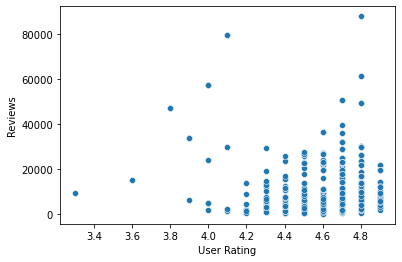

In [51]:
# scaterplot User Rating vs Reviews

sns.scatterplot(x='User Rating', y='Reviews', data=df)
plt.show()

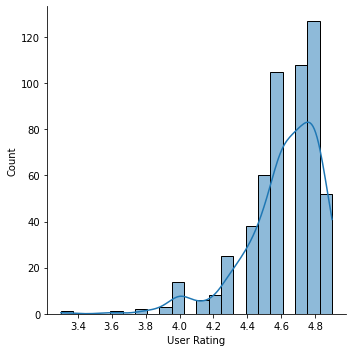

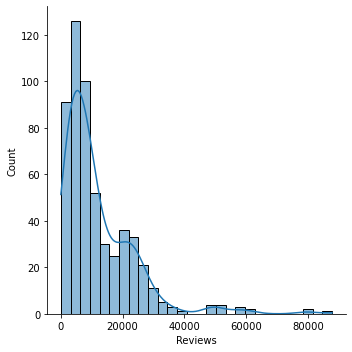

In [54]:
# melihat distribusi data dari setiap variable
sns.displot(x='User Rating', data=df, kde=True)
sns.displot(x='Reviews', data=df, kde=True)
plt.show()

In [45]:
# jika hubungannya linear
df[['User Rating', 'Reviews']].corr(method='pearson')

,User Rating,Reviews
User Rating,1.000000,-0.001729
Reviews,-0.001729,1.000000


In [56]:
df['User Rating'].corr(df['Reviews'], method='pearson')

-0.0017290142555499704

In [46]:
# jika hubungannya tidak linear
df[['User Rating', 'Reviews']].corr(method='spearman')

# Untuk User Rating vs Reviews, kita bisa gunakan Spearman Correlation karena ditribusi data dari kedua variable tsb tidak normal 
# Distribusi data bisa dicek dengan histogram atau frequentis test (D'Agostino, Shapiro Wilk, dll)

,User Rating,Reviews
User Rating,1.000000,0.200458
Reviews,0.200458,1.000000


In [58]:
df['User Rating'].corr(df['Reviews'], method='spearman')

0.20045803777248958